In [4]:
# 导入PyTorch库
import torch
import torch.nn as nn

# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0], 
                 [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
   nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
   nn.ReLU(),            # 隐藏层的ReLU激活函数
   nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
   nn.Sigmoid()           # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
   y_pred = model(x)  # 前向传播，计算预测值
   loss = criterion(y_pred, y)  # 计算损失
   print('epoch: ', epoch, 'loss: ', loss.item())  # 打印损失值

   optimizer.zero_grad()  # 清零梯度
   loss.backward()  # 反向传播，计算梯度
   optimizer.step()  # 更新模型参数

epoch:  0 loss:  0.25417208671569824
epoch:  1 loss:  0.25390732288360596
epoch:  2 loss:  0.2536432445049286
epoch:  3 loss:  0.253379762172699
epoch:  4 loss:  0.2531169652938843
epoch:  5 loss:  0.25285476446151733
epoch:  6 loss:  0.2525932490825653
epoch:  7 loss:  0.25233232975006104
epoch:  8 loss:  0.2520720362663269
epoch:  9 loss:  0.2518124282360077
epoch:  10 loss:  0.25155338644981384
epoch:  11 loss:  0.2512950003147125
epoch:  12 loss:  0.25103724002838135
epoch:  13 loss:  0.25078004598617554
epoch:  14 loss:  0.25052356719970703
epoch:  15 loss:  0.2502676248550415
epoch:  16 loss:  0.2500123381614685
epoch:  17 loss:  0.24975761771202087
epoch:  18 loss:  0.24950352311134338
epoch:  19 loss:  0.24924997985363007
epoch:  20 loss:  0.24899712204933167
epoch:  21 loss:  0.24874480068683624
epoch:  22 loss:  0.24849310517311096
epoch:  23 loss:  0.24824193120002747
epoch:  24 loss:  0.2479914128780365
epoch:  25 loss:  0.2477414608001709
epoch:  26 loss:  0.24749204516410

### 可视化代码

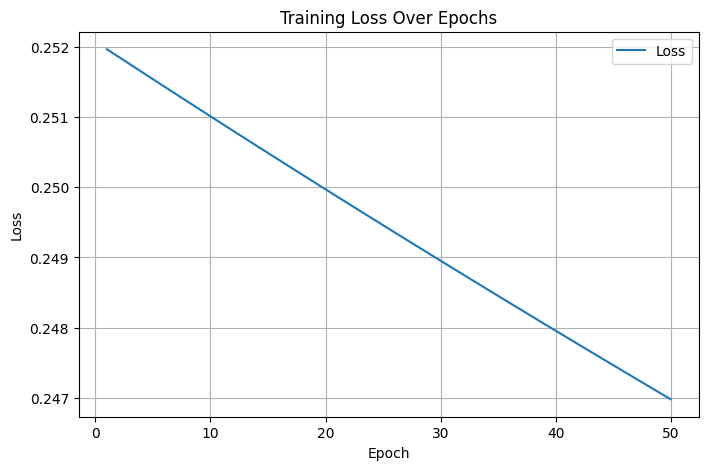

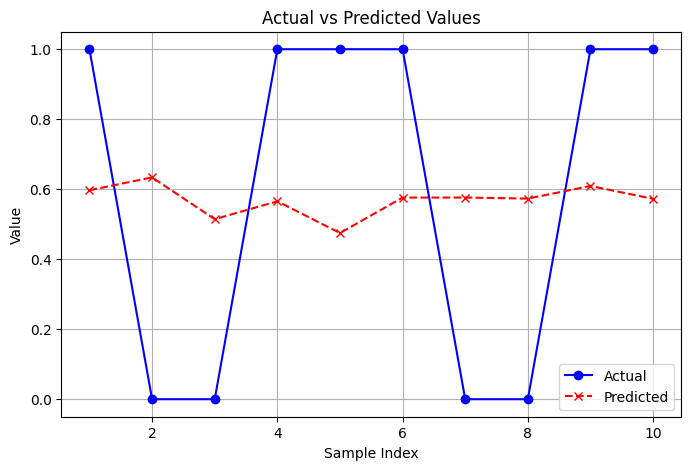

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0], 
                  [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
    nn.ReLU(),            # 隐藏层的ReLU激活函数
    nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
    nn.Sigmoid()           # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 用于存储每轮的损失值
losses = []

# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
    y_pred = model(x)  # 前向传播，计算预测值
    loss = criterion(y_pred, y)  # 计算损失
    losses.append(loss.item())  # 记录损失值
    # print(f'Epoch [{epoch+1}/50], Loss: {loss.item():.4f}')  # 打印损失值

    # 记录一次损失值再清除一次，避免重复累加

    optimizer.zero_grad()  # 清零梯度
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 更新模型参数

# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()  # 最终预测值
y_actual = y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

## 另外一个实例

### 先生成一些随机的数据

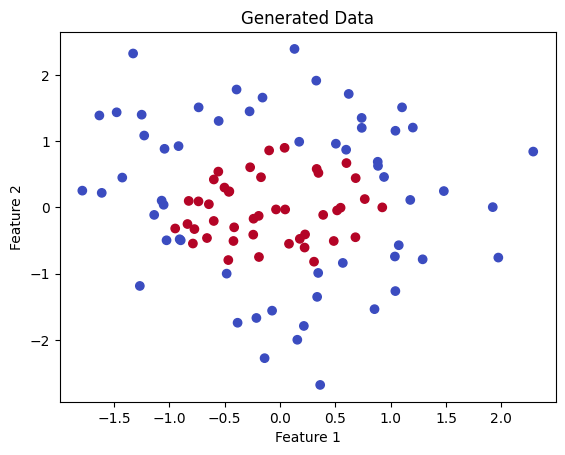

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
# 先通过x和y的坐标计算出点到原点的距离，然后判断点是否在半径为1的圆内
# 如果在圆内，标签为1；如果在圆外，标签为0
# 再用.float()将布尔值转换为浮点数
# 最后用unsqueeze(1)将标签从一维转换为二维,将形状从 [100] 变为 [100, 1]
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 定义神经网络

In [21]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x

# 实例化模型
model = SimpleNN()

### 定义损失函数和优化器

In [22]:
criterion = nn.BCELoss()    # 二分类交叉熵损失函数
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降优化器

### 训练模型

In [23]:
# 训练
epoches = 100
for epoch in range(epoches):
    outputs = model(data)  # 前向传播
    loss = criterion(outputs, labels)  # 计算损失

    # 反向传播
    optimizer.zero_grad() # 梯度清零
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    if(epoch+1) %10 == 0:
        print(f'epoch[{epoch+1}/{epoches}],loss:{loss.item():.4f}')

epoch[10/100],loss:0.6766
epoch[20/100],loss:0.6754
epoch[30/100],loss:0.6742
epoch[40/100],loss:0.6731
epoch[50/100],loss:0.6720
epoch[60/100],loss:0.6711
epoch[70/100],loss:0.6701
epoch[80/100],loss:0.6692
epoch[90/100],loss:0.6683
epoch[100/100],loss:0.6675


### 测试模型并实现可视化

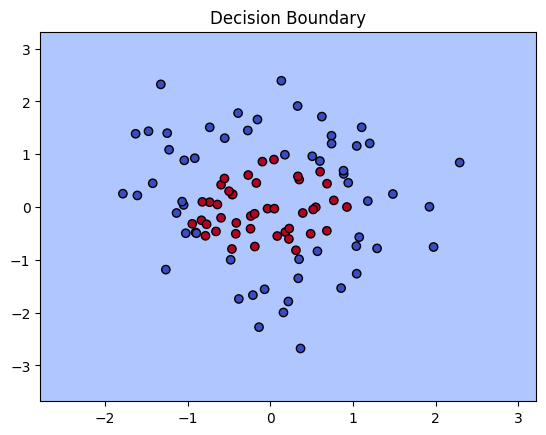

In [26]:
# 可视化决策边界
def plot_decision_boundary(model, data):
    # 计算输入数据的坐标范围，并向外扩展1个单位，确保能够完整显示决策边界
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    
    # 创建网格点，用于预测整个区域的类别
    # meshgrid生成坐标网格，从x_min到x_max以0.1为步长
    # indexing='ij'表示返回的第一个数组对应于第一个输入参数
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    
    # 将两个网格矩阵重塑并拼接成坐标对，形成输入到模型的特征矩阵
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    
    # 使用训练好的模型对网格点进行预测
    # detach()将tensor从计算图中分离，不需要梯度
    # numpy()将tensor转换为numpy数组
    # reshape(xx.shape)将结果重塑为与xx相同的形状，方便可视化
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    
    # 绘制决策边界
    # contourf创建填充的等高线图，用于可视化决策边界
    # levels=[0, 0.5, 1]表示在这些值处绘制等高线，0.5为决策阈值
    # cmap='coolwarm'使用蓝红色映射，蓝色为低值(0)，红色为高值(1)
    # alpha=0.7设置透明度，使得散点能够清晰可见
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    
    # 在决策边界上绘制原始数据点
    # c=labels.squeeze()根据标签着色
    # edgecolors='k'给点加黑色边框，提高可见度
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolors='k')
    
    # 添加图表标题
    plt.title("Decision Boundary")
    
    # 显示图表
    plt.show()

# 调用函数，传入模型和数据，绘制决策边界
plot_decision_boundary(model, data)